#Ejemplo de procesamiento de lenguaje natural

In [1]:
sc.version

'2.4.5'

In [102]:
linesRDD= sc.textFile("../BIBLIACOMPLETA.txt")
linesRDD.first()

'LA SANTA BIBLIA, ANTIGUO TESTAMENTO, VERSI�N DE CASIODORO DE REINA (1569) REVISADA POR CIPRIANO DE VALERA (1602), OTRAS REVISIONES: 1862, 1909 Y 1960'

In [103]:
linesRDD= sc.binaryFiles("../BIBLIACOMPLETA.txt").values().flatMap(lambda x: x.decode("iso-8859-1").splitlines())
linesRDD.take(5)

['LA SANTA BIBLIA, ANTIGUO TESTAMENTO, VERSIÓN DE CASIODORO DE REINA (1569) REVISADA POR CIPRIANO DE VALERA (1602), OTRAS REVISIONES: 1862, 1909 Y 1960',
 '',
 'Parte # 1 (INCLUYE LA LEY), los 10 primeros libros del AT: Gn, Ex, Lv, Nm, Dt, Jos, Jue, Rt, 1 S y 2 S',
 '',
 '']

In [104]:
#linesRDD.collect()
linesRDD.count()


35186

In [105]:
linesRDD.getNumPartitions()

1

In [106]:
mifilter = linesRDD.filter(lambda line: "luz" in line)
mifilter.collect()

['          Y dijo Dios: Sea la luz; y fue la luz.',
 '          Y vio Dios que la luz era buena; y separó Dios la luz de',
 '          Y llamó Dios a la luz Día, y a las tinieblas llamó Noche.',
 '          luz de las tinieblas. Y vio Dios que era bueno.',
 '          tus preñeces; con dolor darás a luz los hijos; y tu deseo',
 '          Conoció Adán a su mujer Eva, la cual concibió y dio a luz',
 '          Después dio a luz a su hermano Abel. Y Abel fue pastor de',
 '          Y conoció Caín a su mujer, la cual concibió y dio a luz a',
 '          Y Ada dio a luz a Jabal, el cual fue padre de los que',
 '          Y Zila también dio a luz a Tubal-caín, artífice de toda',
 '          Y conoció de nuevo Adán a su mujer, la cual dio a luz un',
 '7 Y la halló el ángel de Jehová junto a una fuente de agua en el desierto, junto a la fuente que está en el camino de Shur. 8 Y le dijo: Agar, sierva de Sarai, ¿de dónde vienes tú, y a dónde vas? Y ella respondió: Huyo de delante de Sarai mi s

In [107]:
# contar las palabras más frecuentes de la biblia

In [108]:
# words= linesRDD.flatMap(lambda x: x.split(" ")) #Tokenización
# words.collect()
# words.count()

In [109]:
1. # Tokenizacion
import re
# remove any non-words and split lines into separate words
# finally, convert all words to lowercase
def splitter(line):
    line = re.sub(r'^\W+|\W+$', '', line)
    return map(str.lower, re.split(r'\W+', line))

words= linesRDD.flatMap(splitter)
words.collect()
# words.count()

['la',
 'santa',
 'biblia',
 'antiguo',
 'testamento',
 'versión',
 'de',
 'casiodoro',
 'de',
 'reina',
 '1569',
 'revisada',
 'por',
 'cipriano',
 'de',
 'valera',
 '1602',
 'otras',
 'revisiones',
 '1862',
 '1909',
 'y',
 '1960',
 '',
 'parte',
 '1',
 'incluye',
 'la',
 'ley',
 'los',
 '10',
 'primeros',
 'libros',
 'del',
 'at',
 'gn',
 'ex',
 'lv',
 'nm',
 'dt',
 'jos',
 'jue',
 'rt',
 '1',
 's',
 'y',
 '2',
 's',
 '',
 '',
 'libro',
 'primero',
 'de',
 'moisés',
 '',
 'génesis',
 '',
 'la',
 'creación',
 '',
 'génesis',
 '1',
 '',
 'génesis',
 '1',
 '1',
 'en',
 'el',
 'principio',
 'creó',
 'dios',
 'los',
 'cielos',
 'y',
 'la',
 'tierra',
 '',
 'génesis',
 '1',
 '2',
 'y',
 'la',
 'tierra',
 'estaba',
 'desordenada',
 'y',
 'vacía',
 'y',
 'las',
 'tinieblas',
 'estaban',
 'sobre',
 'la',
 'faz',
 'del',
 'abismo',
 'y',
 'el',
 'espíritu',
 'de',
 'dios',
 'se',
 'movía',
 'sobre',
 'la',
 'faz',
 'de',
 'las',
 'aguas',
 '',
 'génesis',
 '1',
 '3',
 'y',
 'dijo',
 'dios',
 '

In [338]:
#2.a Removing Stop words.  w not in stop_words and not w[0].isdigit()
stop_words={'a','su','al','la','las','de','los','es','para','porque','y','génesis','que', 'el','él','sus', 'en', 'no' , 'lo' ,'del',
           'como', 'yo', 'se' , 'tu', 'le' ,'con', 'un', 'mi', 'me' ,'ha', 'ah', 'te', 'ni', 'por' , 'si' ,'he', 'pero', 'todo', 'todos',
            'asi', 'pues', 'os', 'dijo', 'contra', 'cuando', 'habia', 'asi', 'así', 'delante', 'tús', 'tus', 'mas' , 'antes',
            'entonces', 'vosotros', 'una', 'hasta', 'había', 'será', 'aqui', 'sobre', 'también', 'mí', 'les', 'fue', 'ti', 'ellos', 'tú', 'está', 'aquí',
            'cual', 'entre', 'qué', 'toda', 'todas', 'ella' , 'mis','esto', 'más', 'diciendo', 'son', 'este', 'hizo','sino'
           }
stopW = words.filter(lambda w : w not in stop_words and not w.isdigit() and len(w) != 0)
print(stopW.count())
stopW.collect()

347057


['santa',
 'biblia',
 'antiguo',
 'testamento',
 'versión',
 'casiodoro',
 'reina',
 'revisada',
 'cipriano',
 'valera',
 'otras',
 'revisiones',
 'parte',
 'incluye',
 'ley',
 'primeros',
 'libros',
 'at',
 'gn',
 'ex',
 'lv',
 'nm',
 'dt',
 'jos',
 'jue',
 'rt',
 's',
 's',
 'libro',
 'primero',
 'moisés',
 'creación',
 'principio',
 'creó',
 'dios',
 'cielos',
 'tierra',
 'tierra',
 'estaba',
 'desordenada',
 'vacía',
 'tinieblas',
 'estaban',
 'faz',
 'abismo',
 'espíritu',
 'dios',
 'movía',
 'faz',
 'aguas',
 'dios',
 'sea',
 'luz',
 'luz',
 'vio',
 'dios',
 'luz',
 'era',
 'buena',
 'separó',
 'dios',
 'luz',
 'tinieblas',
 'llamó',
 'dios',
 'luz',
 'día',
 'tinieblas',
 'llamó',
 'noche',
 'tarde',
 'mañana',
 'día',
 'luego',
 'dios',
 'haya',
 'expansión',
 'medio',
 'aguas',
 'separe',
 'aguas',
 'aguas',
 'e',
 'dios',
 'expansión',
 'separó',
 'aguas',
 'estaban',
 'debajo',
 'expansión',
 'aguas',
 'estaban',
 'expansión',
 'llamó',
 'dios',
 'expansión',
 'cielos',
 'ta

In [339]:
#2.b Removing punctuations.
import string
list_punct=list(string.punctuation)
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [340]:
counts= stopW.map(lambda x: (x,1))
print(counts.count())
counts.collect()

347057


[('santa', 1),
 ('biblia', 1),
 ('antiguo', 1),
 ('testamento', 1),
 ('versión', 1),
 ('casiodoro', 1),
 ('reina', 1),
 ('revisada', 1),
 ('cipriano', 1),
 ('valera', 1),
 ('otras', 1),
 ('revisiones', 1),
 ('parte', 1),
 ('incluye', 1),
 ('ley', 1),
 ('primeros', 1),
 ('libros', 1),
 ('at', 1),
 ('gn', 1),
 ('ex', 1),
 ('lv', 1),
 ('nm', 1),
 ('dt', 1),
 ('jos', 1),
 ('jue', 1),
 ('rt', 1),
 ('s', 1),
 ('s', 1),
 ('libro', 1),
 ('primero', 1),
 ('moisés', 1),
 ('creación', 1),
 ('principio', 1),
 ('creó', 1),
 ('dios', 1),
 ('cielos', 1),
 ('tierra', 1),
 ('tierra', 1),
 ('estaba', 1),
 ('desordenada', 1),
 ('vacía', 1),
 ('tinieblas', 1),
 ('estaban', 1),
 ('faz', 1),
 ('abismo', 1),
 ('espíritu', 1),
 ('dios', 1),
 ('movía', 1),
 ('faz', 1),
 ('aguas', 1),
 ('dios', 1),
 ('sea', 1),
 ('luz', 1),
 ('luz', 1),
 ('vio', 1),
 ('dios', 1),
 ('luz', 1),
 ('era', 1),
 ('buena', 1),
 ('separó', 1),
 ('dios', 1),
 ('luz', 1),
 ('tinieblas', 1),
 ('llamó', 1),
 ('dios', 1),
 ('luz', 1),
 ('dí

In [341]:
counts= counts.reduceByKey( lambda x,y: x+y)
print(counts.count())
counts.collect()

25949


[('santa', 80),
 ('biblia', 6),
 ('antiguo', 22),
 ('testamento', 6),
 ('versión', 6),
 ('casiodoro', 4),
 ('reina', 81),
 ('revisada', 4),
 ('cipriano', 4),
 ('valera', 4),
 ('otras', 87),
 ('revisiones', 4),
 ('parte', 302),
 ('incluye', 3),
 ('ley', 491),
 ('primeros', 58),
 ('libros', 14),
 ('at', 3),
 ('gn', 7),
 ('ex', 33),
 ('lv', 8),
 ('nm', 11),
 ('dt', 22),
 ('jos', 4),
 ('jue', 3),
 ('rt', 1),
 ('s', 22),
 ('libro', 203),
 ('primero', 180),
 ('moisés', 880),
 ('creación', 19),
 ('principio', 109),
 ('creó', 23),
 ('dios', 4282),
 ('cielos', 370),
 ('tierra', 2938),
 ('estaba', 731),
 ('desordenada', 1),
 ('vacía', 10),
 ('tinieblas', 142),
 ('estaban', 465),
 ('faz', 76),
 ('abismo', 35),
 ('espíritu', 628),
 ('movía', 6),
 ('aguas', 386),
 ('sea', 653),
 ('luz', 391),
 ('vio', 211),
 ('era', 830),
 ('buena', 140),
 ('separó', 5),
 ('llamó', 211),
 ('día', 1465),
 ('noche', 359),
 ('tarde', 81),
 ('mañana', 288),
 ('luego', 427),
 ('haya', 254),
 ('expansión', 15),
 ('medio'

In [342]:
print(counts.max(lambda x: x[1])) # el más frec

('jehová', 6941)


In [343]:
df = counts.toDF(["Keywords","Frequency"]) #converting RDD to spark dataframe

In [344]:
# df.show()
# df.toPandas()

In [345]:
df.createOrReplaceTempView("myTable") 
df2 = spark.sql("SELECT Keywords, Frequency from myTable order by Frequency desc limit 20 ") #renaming columns 
df2.toPandas() #converting spark dataframes to pandas dataframes

,Keywords,Frequency
0,jehová,6941
1,dios,4282
2,tierra,2938
3,hijos,2857
4,israel,2658
5,rey,2515
6,hijo,2445
7,casa,1969
8,pueblo,1817
9,día,1465


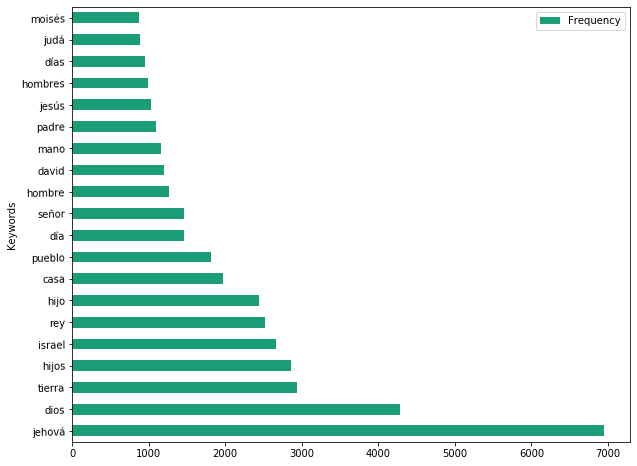

In [346]:
df.createOrReplaceTempView("myTable") 
df2 = spark.sql("SELECT Keywords, Frequency from myTable order by Frequency desc limit 20  ") #renaming columns 
pandD = df2.toPandas() #converting spark dataframes to pandas dataframes
pandD.plot.barh(x='Keywords', y='Frequency', rot=1, figsize=(10,8), colormap='Dark2')

In [347]:
from wordcloud import WordCloud, STOPWORDS

In [348]:
""" libs """
# print(__doc__)
import sys
print(sys.version)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


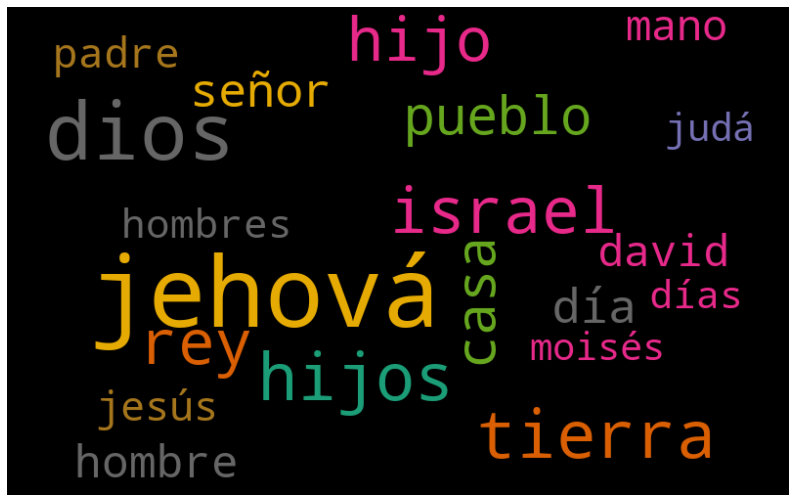

In [349]:
wordcloudConvertDF = pandD.set_index('Keywords').T.to_dict('records')
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate_from_frequencies(dict(*wordcloudConvertDF))
plt.figure(figsize=(14, 10))    
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()